In [ ]:
import tensorflow as tf
print(tf.__version__)
# tf.config.set_visible_devices(tf.config.list_physical_devices('GPU'))
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D,ZeroPadding2D
from keras.layers import Input, Lambda
# from keras.utils import np_utils
# from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE






In [ ]:
tf.config.get_visible_devices()


In [ ]:

# Define aspects of the model and create instances of both the 
# test and train batch generators and the complete model.

imsize = 28
batch_size = 32
embedding_dim = 2 
LR = 0.0001
EPOCHS = 5
alpha = 0.2 
input_x=20
input_y=125
total_classes=2


In [ ]:
import pickle
import numpy as np

def get_image_count(file_path):
    with open(file_path, 'rb') as f:
        loaded_data = pickle.load(f)

    # Check if the loaded data is a numpy array
    if isinstance(loaded_data, np.ndarray):
        return loaded_data.shape[2]
    else:
        return 0

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
import time



data_folder_path="data"
# Specify the directory path
X_seiz_train=[]
X_seiz_test=[]

X_bckg_train=[]
X_bckg_test=[]

image_count=20000

In [ ]:


def reset_image_arr(test=0):
    global data_folder_path        
    
    
    X_bckg_train, X_bckg_test, X_seiz_train, X_seiz_test=[],[],[],[]
    print("   --reset image started at",time.time(), test,len(X_bckg_train), len(X_bckg_test), len(X_seiz_train), len(X_seiz_test) )

    if test==2:
        seiz_folder_path_test=data_folder_path+"/test_data/seiz"
        bckg_folder_path_test=data_folder_path+"/test_data/bckg"
        seiz_file_names_test=os.listdir(seiz_folder_path_test)
        bckg_file_names_test=os.listdir(bckg_folder_path_test)

        while len(X_seiz_test)<image_count:
            i=random.randint(0, len(seiz_file_names_test)-1)
            file_p = os.path.join(seiz_folder_path_test, seiz_file_names_test[i])
            with open(file_p, 'rb') as f:
                loaded_data = pickle.load(f)


            n=loaded_data.shape[2]
            x=min(1000,max(1,n//4)) 
            idx_arr=set()

            while len(idx_arr) < x:
                idx_arr.add(random.randint(0, n - 1))
            for i in idx_arr:
                X_seiz_test.append(loaded_data[:, :, i])

        while len(X_bckg_test)<image_count:
            i=random.randint(0, len(bckg_file_names_test)-1)
            file_p = os.path.join(bckg_folder_path_test, bckg_file_names_test[i])
            with open(file_p, 'rb') as f:
                loaded_data = pickle.load(f)

            n=loaded_data.shape[2]
            x=min(1000,max(1,n//4)) 
            idx_arr=set()

            while len(idx_arr) < x:
                idx_arr.add(random.randint(0, n - 1))
            for i in idx_arr:
                X_bckg_test.append(loaded_data[:, :, i])
        
    else:
        seiz_folder_path_train=data_folder_path+"/train_data/seiz"
        bckg_folder_path_train=data_folder_path+"/train_data/bckg"
        seiz_folder_path_val=data_folder_path+"/val_data/seiz"
        bckg_folder_path_val=data_folder_path+"/val_data/bckg"

        seiz_file_names_train=os.listdir(seiz_folder_path_train)
        bckg_file_names_train=os.listdir(bckg_folder_path_train)

        seiz_file_names_val=os.listdir(seiz_folder_path_val)
        bckg_file_names_val=os.listdir(bckg_folder_path_val)

        while len(X_seiz_train)<image_count*0.8:
            i=random.randint(0, len(seiz_file_names_train)-1)
            file_p = os.path.join(seiz_folder_path_train, seiz_file_names_train[i])
            with open(file_p, 'rb') as f:
                loaded_data = pickle.load(f)


            n=loaded_data.shape[2]
            x=min(1000,max(1,n//4)) 
            idx_arr=set()

            while len(idx_arr) < x:
                idx_arr.add(random.randint(0, n - 1))
            for i in idx_arr:
                X_seiz_train.append(loaded_data[:, :, i])
        
        while len(X_seiz_test)<image_count*0.2:
            i=random.randint(0, len(seiz_file_names_val)-1)
            file_p = os.path.join(seiz_folder_path_val, seiz_file_names_val[i])
            with open(file_p, 'rb') as f:
                loaded_data = pickle.load(f)


            n=loaded_data.shape[2]
            x=min(1000,max(1,n//4)) 
            idx_arr=set()

            while len(idx_arr) < x:
                idx_arr.add(random.randint(0, n - 1))
            for i in idx_arr:
                X_seiz_test.append(loaded_data[:, :, i])

        while len(X_bckg_train)<image_count*0.8:
            i=random.randint(0, len(bckg_file_names_train)-1)
            file_p = os.path.join(bckg_folder_path_train, bckg_file_names_train[i])
            with open(file_p, 'rb') as f:
                loaded_data = pickle.load(f)

            n=loaded_data.shape[2]
            x=min(1000,max(1,n//4)) 
            idx_arr=set()

            while len(idx_arr) < x:
                idx_arr.add(random.randint(0, n - 1))
            for i in idx_arr:
                X_bckg_train.append(loaded_data[:, :, i])
        
        while len(X_bckg_test)<image_count*0.2:
            i=random.randint(0, len(bckg_file_names_val)-1)
            file_p = os.path.join(bckg_folder_path_val, bckg_file_names_val[i])
            with open(file_p, 'rb') as f:
                loaded_data = pickle.load(f)

            n=loaded_data.shape[2]
            x=min(1000,max(1,n//4)) 
            idx_arr=set()

            while len(idx_arr) < x:
                idx_arr.add(random.randint(0, n - 1))
            for i in idx_arr:
                X_bckg_test.append(loaded_data[:, :, i])
    print("   --reset image successfully at",time.time(), test,len(X_bckg_train), len(X_bckg_test), len(X_seiz_train), len(X_seiz_test) )
    return X_seiz_train, X_seiz_test, X_bckg_train, X_bckg_test

    

    




In [ ]:
X_seiz_train, X_seiz_test, X_bckg_train, X_bckg_test=reset_image_arr(test=2)
print(len(X_bckg_train),len(X_seiz_train),len(X_bckg_test),len(X_seiz_test))

In [ ]:
print(len(X_bckg_train),len(X_seiz_train),len(X_bckg_test),len(X_seiz_test))

In [ ]:
def get_image(label, test=0):
    """Choose an image from our training or test data with the
    given label."""
    # if test:
    #     y = y_test; X = X_test_paths
    # else:
    #     y = y_train; X = X_train_paths

    # return np.random.rand(20, 125)
    # print("Here",label,test,len(X_bckg_train),len(X_seiz_train),len(X_bckg_test),len(X_seiz_test))
    
    idx=0
    file_p=""
    img_idx=-1
    try:
        if label==0:
            if test!=0:
                idx = np.random.randint(len(X_bckg_test))
                img=X_bckg_test[idx]
            else:
                idx = np.random.randint(len(X_bckg_train))
                img=X_bckg_train[idx]

        else:
            if test!=0:
                idx = np.random.randint(len(X_seiz_test))
                img=X_seiz_test[idx]
            else:
                idx = np.random.randint(len(X_seiz_train))
                img=X_seiz_train[idx]
    except Exception as e:
        print("Exception while getting image ",time.time(),label,test,len(X_bckg_train),len(X_seiz_train),len(X_bckg_test),len(X_seiz_test),e)
        return 

    
    return img
    
def get_triplet(test=0):
    """Choose a triplet (anchor, positive, negative) of images
    such that anchor and positive have the same label and
    anchor and negative have different labels."""
    a = np.random.randint(total_classes)
    # while n == a:
    #     # keep searching randomly!
    #     n = np.random.randint(total_classes)
    n=1-a
    
    a, p = get_image(a, test), get_image(a, test)
    n = get_image(n, test)
    return a, p, n

def generate_triplets(test=0):
    global X_seiz_train, X_seiz_test, X_bckg_train, X_bckg_test

    """Generate an un-ending stream (ie a generator) of triplets for
    training or test."""
    limit=0
    while True:
        if limit%100==0:
            print("--Calling reset_image at ",time.time())
            X_seiz_train, X_seiz_test, X_bckg_train, X_bckg_test=reset_image_arr(test)

            
        # print(1)
        list_a = []
        list_p = []
        list_n = []

        for i in range(batch_size):
            # print(i)
            a, p, n = get_triplet(test)
            list_a.append(a)
            list_p.append(p)
            list_n.append(n)
            
        A = np.array(list_a, dtype='float32')
        P = np.array(list_p, dtype='float32')
        N = np.array(list_n, dtype='float32')
        # a "dummy" label which will come in to our identity loss
        # function below as y_true. We'll ignore it.
        label = np.ones(batch_size)
        # print("Batch done",limit)
        yield [A, P, N], label
        limit+=1
        


In [56]:
def generate_classification_data(test=0):
    global X_seiz_train, X_seiz_test, X_bckg_train, X_bckg_test
    """Generate an un-ending stream (ie a generator) of triplets for
    training or test."""
    limit=0
    while True:
        if limit%100==0:
            print("--Calling reset_image at ",time.time())
            X_seiz_train, X_seiz_test, X_bckg_train, X_bckg_test=reset_image_arr(test)
            
        # print(1)
        a=[]
        label=[]
        for i in range(batch_size//2):
            # print(i)
            img_b=get_image(0,test)
            a.append(img_b)
            label.append(0)
            img_s=get_image(1,test)
            a.append(img_s)
            label.append(1)
            

            
            
        A = np.array(a, dtype='float32')
        label = np.array(label)

        rng_state = np.random.get_state()

        # Shuffle the first array
        np.random.shuffle(A)

        # Set the random state to the state obtained earlier
        np.random.set_state(rng_state)

        # Shuffle the second array
        np.random.shuffle(label)
        # print("Batch done",limit)
        yield [A], label
        limit+=1

In [ ]:
xx = generate_classification_data(test=0)
next(xx)

In [ ]:
print(get_image(0).shape)

In [ ]:
# import random
# def get_triplet_batch(test=False):
#     x=(batch_size//2)*3
#     if test:
#         n=len(X_bckg_test)-1
#     else:
#         n=len(X_bckg_train)-1


#     A=[]
#     P=[]
#     N=[]

#     bckg = [random.randint(0, n) for _ in range(x)]

#     if test:
#         n=len(X_seiz_test)-1
#     else:
#         n=len(X_seiz_train)-1

#     seiz = [random.randint(0, n) for _ in range(x)]

#     if test:
#         for i in range(batch_size//2):
#             file_p_a, img_idx_a=X_bckg_test[bckg[2*i]]
#             file_p_p, img_idx_p=X_bckg_test[bckg[2*i+1]]
#             file_p_n, img_idx_n=X_seiz_test[seiz[i]]
#             with open(file_p_a, 'rb') as f_a:
#                 loaded_data_a = pickle.load(f_a)
#             A.append(loaded_data_a[:, :, img_idx_a])

#             with open(file_p_p, 'rb') as f_p:
#                 loaded_data_p = pickle.load(f_p)
#             P.append(loaded_data_p[:, :, img_idx_p])

#             with open(file_p_n, 'rb') as f_n:
#                 loaded_data_n = pickle.load(f_n)
#             N.append(loaded_data_n[:, :, img_idx_n])

        
#         for i in range(batch_size//2):
#             file_p_a, img_idx_a=X_seiz_test[seiz[batch_size//2+2*i]]
#             file_p_p, img_idx_p=X_seiz_test[seiz[batch_size//2+2*i+1]]
#             file_p_n, img_idx_n=X_bckg_test[bckg[batch_size+i]]
#             with open(file_p_a, 'rb') as f_a:
#                 loaded_data_a = pickle.load(f_a)
#             A.append(loaded_data_a[:, :, img_idx_a])

#             with open(file_p_p, 'rb') as f_p:
#                 loaded_data_p = pickle.load(f_p)
#             P.append(loaded_data_p[:, :, img_idx_p])

#             with open(file_p_n, 'rb') as f_n:
#                 loaded_data_n = pickle.load(f_n)
#             N.append(loaded_data_n[:, :, img_idx_n])

#     else:
#         for i in range(batch_size//2):
#             file_p_a, img_idx_a=X_bckg_train[bckg[2*i]]
#             file_p_p, img_idx_p=X_bckg_train[bckg[2*i+1]]
#             file_p_n, img_idx_n=X_seiz_train[seiz[i]]
#             with open(file_p_a, 'rb') as f_a:
#                 loaded_data_a = pickle.load(f_a)
#             A.append(loaded_data_a[:, :, img_idx_a])

#             with open(file_p_p, 'rb') as f_p:
#                 loaded_data_p = pickle.load(f_p)
#             P.append(loaded_data_p[:, :, img_idx_p])

#             with open(file_p_n, 'rb') as f_n:
#                 loaded_data_n = pickle.load(f_n)
#             N.append(loaded_data_n[:, :, img_idx_n])

        
#         for i in range(batch_size//2):
#             file_p_a, img_idx_a=X_seiz_train[seiz[batch_size//2+2*i]]
#             file_p_p, img_idx_p=X_seiz_train[seiz[batch_size//2+2*i+1]]
#             file_p_n, img_idx_n=X_bckg_train[bckg[batch_size+i]]
#             with open(file_p_a, 'rb') as f_a:
#                 loaded_data_a = pickle.load(f_a)
#             A.append(loaded_data_a[:, :, img_idx_a])

#             with open(file_p_p, 'rb') as f_p:
#                 loaded_data_p = pickle.load(f_p)
#             P.append(loaded_data_p[:, :, img_idx_p])

#             with open(file_p_n, 'rb') as f_n:
#                 loaded_data_n = pickle.load(f_n)
#             N.append(loaded_data_n[:, :, img_idx_n])
    
#     A = np.array(A, dtype='float32')
#     P = np.array(P, dtype='float32')
#     N = np.array(N, dtype='float32')
#     print(bckg)


# get_triplet_batch()
    
    

In [ ]:
# t=[]
# for i in range(batch_size):
#     xx=get_triplet()
#     t.append(xx)
#     print(i)

In [ ]:
# train_generator = generate_triplets()

In [ ]:
# batch = next(train_generator)

In [ ]:
# print(len(batch[0][0]))

In [ ]:
# batch = next(train_generator)

In [ ]:
# batch[0][0].shape

In [ ]:
def mean_loss(y_true, y_pred):
    return K.mean(y_pred)

def triplet_loss(x, alpha = 0.2):
    # Triplet Loss function.
    anchor,positive,negative = x
    # distance between the anchor and the positive
    pos_dist = K.sum(K.square(anchor-positive),axis=1)
    # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)
    # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.0)
    return loss

def embedding_model():
    # Simple convolutional model 
    # used for the embedding model.
    model = Sequential()
    model.add(Input(shape=(input_x, input_y, 1), name='input_layer'))  # Input layer
    model.add(Convolution2D(32, (3, 3), activation='relu', name='convolution_1'))
    model.add(Convolution2D(64, (3, 3), activation='relu', name='convolution_2'))
    model.add(MaxPooling2D(pool_size=(2,2), name='max_pooling'))
    model.add(Dropout(0.25, name='dropout_1'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='dense_1'))
    model.add(Dropout(0.5, name='dropout_2'))
    model.add(Dense(64, name='dense_2'))
    return model


def complete_model(base_model):
    # Create the complete model with three
    # embedding models and minimize the loss 
    # between their output embeddings
    input_1 = Input((input_x, input_y,1), name='input_layer_A')
    input_2 = Input((input_x, input_y,1), name='input_layer_P')
    input_3 = Input((input_x, input_y,1), name='input_layer_N')
        
    A = base_model(input_1)
    P = base_model(input_2)
    N = base_model(input_3)
   
    loss = Lambda(triplet_loss)([A, P, N]) 
    model = Model(inputs=[input_1, input_2, input_3], outputs=loss)
    model.compile(loss=mean_loss, optimizer=Adam(LR))
    return model
  

In [ ]:
# Define aspects of the model and create instances of both the 
# test and train batch generators and the complete model.

# imsize = 28
# batch_size = 100
# embedding_dim = 2 
# LR = 0.0001
# EPOCHS = 5
# alpha = 0.2 

train_generator_emd = generate_triplets()
val_generator_emd = generate_triplets(test=1)
# batch = next(_emd)

emd_model = embedding_model()
cmp_model = complete_model(emd_model)
cmp_model.summary()

In [ ]:
# emd_model.summary()

In [ ]:
# tf.config.get_visible_devices()


In [ ]:
# # Fit the model using triplet images provided by the train batch generator.
# # Save the trained weights.

# from keras.callbacks import ModelCheckpoint

# # Define a callback to save the model weights after each epoch
# checkpoint_callback = ModelCheckpoint(filepath='model_weights/siamese_model_3.h5', 
#                                       save_weights_only=False,
#                                       verbose=1)



# # Fit the model with the callback
# # with tf.device("/cpu:0"):
# history = cmp_model.fit_generator(train_generator_emd, 
#                             validation_data=val_generator_emd, 
#                             epochs=5, 
#                             verbose=1,
#                             steps_per_epoch=1000, 
#                             validation_steps=30,
#                             callbacks=[checkpoint_callback])





In [ ]:
# tf.config.get_visible_devices()


In [ ]:

# # Fit the model with the callback
# history = model.fit_generator(train_generator, 
#                               validation_data=test_generator, 
#                               epochs=10, 
#                               verbose=2,
#                               steps_per_epoch=1000, 
#                               validation_steps=30)


In [ ]:
# model.save("model_weights/siamese_model.h5")

In [ ]:
from keras.models import load_model


In [ ]:
emd_model_arc = embedding_model()
complete_model = complete_model(emd_model_arc)
complete_model.load_weights('model_weights/siamese_model_2.h5')

In [ ]:
complete_model.summary()

In [ ]:
emd_model = embedding_model()

emd_model = complete_model.get_layer('sequential_1')

# # # Get the weights of the sequential part
# # sequential_weights = sequential_model.get_weights()


In [ ]:
emd_model.summary()

In [ ]:
X_seiz_train, X_seiz_test, X_bckg_train, X_bckg_test=reset_image_arr(test=2)

In [ ]:
seiz_image_sample=get_image(1,test=2)
bckg_image_sample=get_image(0,test=2)
plt.imshow(seiz_image_sample)
plt.show()
plt.imshow(bckg_image_sample)
plt.show()


In [ ]:
seiz_image_sample.shape

In [ ]:
seiz_image_sample_reshaped = seiz_image_sample.reshape(1, 20, 125, 1)
bckg_image_sample_reshaped = bckg_image_sample.reshape(1, 20, 125, 1)


In [ ]:
seiz_image_sample_reshaped.shape

In [ ]:
plt.imshow(seiz_image_sample_reshaped[0])
plt.show()
plt.imshow(bckg_image_sample_reshaped[0])
plt.show()

In [ ]:
seiz_emd_sample=emd_model.predict(seiz_image_sample_reshaped)
bckg_emd_sample=emd_model.predict(bckg_image_sample_reshaped)


In [ ]:
seiz_emd_sample,bckg_emd_sample

In [ ]:
neg_dis=K.sum(K.square(seiz_emd_sample-bckg_emd_sample),axis=1)
print(neg_dis)

In [ ]:
seiz_image_sample2=get_image(1,2)
seiz_image_sample_reshaped2 = seiz_image_sample2.reshape(1, 20, 125, 1)
seiz_emd_sample2=emd_model.predict(seiz_image_sample_reshaped2)


In [ ]:
pos_dis=K.sum(K.square(seiz_emd_sample-seiz_emd_sample2),axis=1)
print(pos_dis)

In [ ]:
bi=[]
si=[]

for i in range(10):
    bi.append(get_image(0,2).reshape(1, 20, 125, 1))
    si.append(get_image(1,2).reshape(1, 20, 125, 1))


In [ ]:
bi=np.array(bi)
si=np.array(si)
bi.shape

In [ ]:
se=[]
be=[]

for i in bi:
    be.append(emd_model.predict(i))

for i in si:
    se.append(emd_model.predict(i))

be=np.array(be)
se=np.array(se)


In [ ]:
se.shape, be.shape

In [ ]:
se[0]

In [ ]:
se[1]

In [ ]:
x=[]
y=[]
for i in range(10):
    for j in range(10):
        bb=K.sum(K.square(be[i]-be[j]),axis=1)
        bb=bb.numpy()[0]
        x.append(0)
        y.append(bb)

        ss=K.sum(K.square(se[i]-se[j]),axis=1)
        ss=ss.numpy()[0]
        x.append(2)
        y.append(ss)

        sb=K.sum(K.square(se[i]-be[j]),axis=1)
        sb=sb.numpy()[0]
        x.append(1)
        y.append(sb)

x=np.array(x)
y=np.array(y)

In [ ]:
x.shape, y.shape

In [ ]:
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Example')

# Displaying the plot
plt.show()

In [57]:

def classification_model(embedding_model):
    """
    Create a classification model on top of the embedding model.
    
    Args:
    embedding_model: Pretrained embedding model
    
    Returns:
    classification_model: Model for classification on top of the embedding model
    """
    # Freeze the layers of the embedding model
    for layer in embedding_model.layers:
        layer.trainable = False
    
    model = Sequential()
    model.add(Input(shape=(input_x, input_y, 1), name='input_layer'))  # Input layer
    model.add(embedding_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # 2 classes for binary classification
    
    return model







In [58]:
# Step 2: Freeze pretrained model weights


# Assuming you have an embedding_model created using your function

# Create the classification model
classifier_model = classification_model(emd_model)

# Compile the model
classifier_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])


In [59]:
classifier_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 64)                7899840   
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 7904130 (30.15 MB)
Trainable params: 4290 (16.76 KB)
Non-trainable params: 7899840 (30.14 MB)
_________________________________________________________________


In [60]:
train_generator_cls=generate_classification_data()
val_generator_cls=generate_classification_data(test=1)


In [61]:
batch = next(train_generator_cls)
batch[0][0]

--Calling reset_image at  1711826408.294237
   --reset image started at 1711826408.294288 0 0 0 0 0
   --reset image successfully at 1711826412.567054 0 16116 4000 16851 4028


array([[[1.1196454 , 1.5703079 , 1.4554425 , ..., 0.8375998 ,
         1.4418241 , 1.2365816 ],
        [1.173624  , 1.2542723 , 1.1483768 , ..., 0.8491255 ,
         0.7487686 , 1.2560912 ],
        [1.2150924 , 1.5902333 , 1.1225473 , ..., 0.66045254,
         1.7409877 , 1.305746  ],
        ...,
        [1.560252  , 0.8525763 , 1.5534775 , ..., 1.3667549 ,
         1.1080226 , 1.5394126 ],
        [0.3524154 , 1.541664  , 1.5150613 , ..., 1.4539295 ,
         1.2399273 , 1.4257284 ],
        [1.0607064 , 1.8225268 , 2.2783093 , ..., 1.7351741 ,
         1.2098974 , 1.6203785 ]],

       [[1.0914099 , 1.9225518 , 1.0889789 , ..., 1.2591628 ,
         1.1811279 , 1.320803  ],
        [0.641254  , 2.0200484 , 2.257233  , ..., 1.673207  ,
         0.40913746, 0.68160355],
        [1.1160172 , 1.0930287 , 0.6132384 , ..., 1.6005739 ,
         1.4911256 , 0.9991855 ],
        ...,
        [2.643669  , 2.7811153 , 2.7216566 , ..., 2.5075114 ,
         2.433426  , 2.2134635 ],
        [1.8

In [62]:
from keras.callbacks import ModelCheckpoint

# Define a callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint(filepath='model_weights/siamese_classification_model_3.h5', 
                                      save_weights_only=False,
                                      verbose=1)

# Fit the model with the callback
history = classifier_model.fit_generator(train_generator_cls, 
                              validation_data=val_generator_cls, 
                              epochs=4, 
                              verbose=1,
                              steps_per_epoch=1000, 
                              validation_steps=30,
                              callbacks=[checkpoint_callback])

/var/folders/p9/5sdbkwy556z7qfq1lmd8s15c0000gn/T/ipykernel_15052/3831115453.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier_model.fit_generator(train_generator_cls,


Epoch 1/4
  87/1000 [=>............................] - ETA: 22s - loss: 0.8660 - accuracy: 0.6530--Calling reset_image at  1711826435.474688
   --reset image started at 1711826435.477947 0 0 0 0 0
 182/1000 [====>.........................] - ETA: 41s - loss: 0.7711 - accuracy: 0.6538--Calling reset_image at  1711826442.347718
   --reset image started at 1711826442.349988 0 0 0 0 0
 266/1000 [======>.......................] - ETA: 43s - loss: 0.7042 - accuracy: 0.6779--Calling reset_image at  1711826448.939577
   --reset image started at 1711826448.940127 0 0 0 0 0
 333/1000 [========>.....................] - ETA: 46s - loss: 0.6740 - accuracy: 0.6860--Calling reset_image at  1711826456.512813
   --reset image started at 1711826456.513503 0 0 0 0 0
 434/1000 [============>.................] - ETA: 38s - loss: 0.6494 - accuracy: 0.6912--Calling reset_image at  1711826462.389907
   --reset image started at 1711826462.3941681 0 0 0 0 0
 532/1000 [==============>...............] - ETA: 31s 

/opt/homebrew/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


  68/1000 [=>............................] - ETA: 39s - loss: 0.5175 - accuracy: 0.7537--Calling reset_image at  1711826516.5932531
   --reset image started at 1711826516.595 0 0 0 0 0
 135/1000 [===>..........................] - ETA: 1:07 - loss: 0.5091 - accuracy: 0.7530--Calling reset_image at  1711826524.2532868
   --reset image started at 1711826524.2543821 0 0 0 0 0
 238/1000 [======>.......................] - ETA: 1:00 - loss: 0.5197 - accuracy: 0.7505--Calling reset_image at  1711826532.7547
   --reset image started at 1711826532.755338 0 0 0 0 0
 331/1000 [========>.....................] - ETA: 52s - loss: 0.5333 - accuracy: 0.7481--Calling reset_image at  1711826539.792115
   --reset image started at 1711826539.7935371 0 0 0 0 0
 429/1000 [===========>..................] - ETA: 43s - loss: 0.5315 - accuracy: 0.7512--Calling reset_image at  1711826546.577728
   --reset image started at 1711826546.578898 0 0 0 0 0
 534/1000 [===============>..............] - ETA: 36s - loss: 0.

In [63]:
emd_model_arc = embedding_model()
classifier_model_final = classification_model(emd_model_arc)
classifier_model_final.load_weights('model_weights/siamese_classification_model_3.h5')

In [ ]:
rnd_image=get_image(0,2).reshape(1, 20, 125, 1)


In [ ]:
rnd_image=get_image(1,2).reshape(1, 20, 125, 1)
classifier_model_final.predict(rnd_image)

--Calling reset_image at  1711826819.635697
   --reset image started at 1711826819.6358101 2 0 0 0 0
   --reset image successfully at 1711826821.8939729 2 0 20127 0 20043
1/1 [==============================] - 0s 10ms/step
--Calling reset_image at  1711826834.528335
   --reset image started at 1711826834.528388 2 0 0 0 0
   --reset image successfully at 1711826838.599274 2 0 20150 0 20022
1/1 [==============================] - 0s 11ms/step
--Calling reset_image at  1711826844.192186
   --reset image started at 1711826844.192238 2 0 0 0 0
   --reset image successfully at 1711826848.093178 2 0 20161 0 20381
1/1 [==============================] - 0s 11ms/step
--Calling reset_image at  1711826856.405177
   --reset image started at 1711826856.4052532 2 0 0 0 0
   --reset image successfully at 1711826861.559017 2 0 20218 0 20156
1/1 [==============================] - 0s 13ms/step


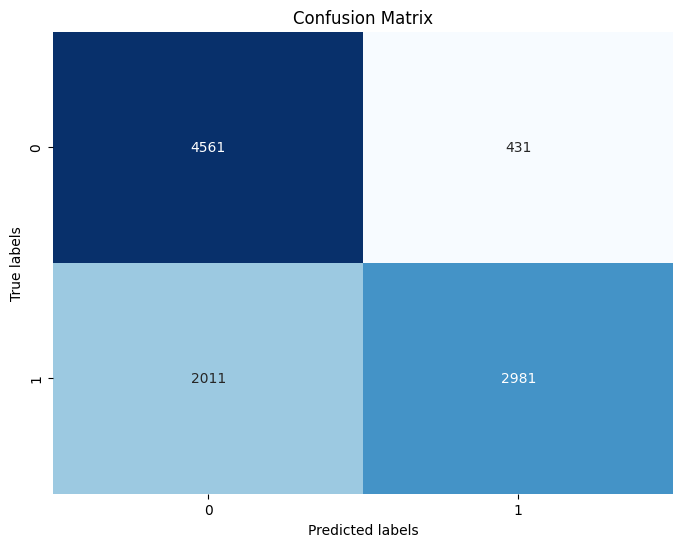

              precision    recall  f1-score   support

           0       0.69      0.91      0.79      4992
           1       0.87      0.60      0.71      4992

    accuracy                           0.76      9984
   macro avg       0.78      0.76      0.75      9984
weighted avg       0.78      0.76      0.75      9984



In [64]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined and loaded your model
# model = ...

# Generate data
num_samples=10000

data_generator = generate_classification_data(test=2)

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the generated data and obtain predictions
for i in range(num_samples // batch_size):  # Adjust num_samples as per your need
    X, y_true = next(data_generator)
    y_pred = classifier_model_final.predict(X)  # Assuming model.predict returns probabilities

    true_labels.extend(y_true)
    predicted_labels.extend(np.argmax(y_pred, axis=1))  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Compute and print classification report
print(classification_report(true_labels, predicted_labels))
